In [1]:
! pip install cvxpy 
! pip install riskfolio-lib
! pip install yfinance


  Using cached cvxpy-1.2.2-cp39-cp39-macosx_10_9_universal2.whl (1.1 MB)


  Using cached scipy-1.9.3-cp39-cp39-macosx_12_0_arm64.whl (28.6 MB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/135.2 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 2.8 MB/s eta 0:00:00


  Installing build dependencies ... -

 \

 |

 /

 -

 done


  Getting requirements to build wheel ... done


  Preparing metadata (pyproject.toml) ... -

 \

 done


  Using cached osqp-0.6.2.post8.tar.gz (227 kB)


  Installing build dependencies ... -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 error


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [174 lines of output]
        Using cached oldest_supported_numpy-2022.11.19-py3-none-any.whl (4.9 kB)
        Using cached setuptools-65.6.3-py3-none-any.whl (1.2 MB)
        Using cached wheel-0.38.4-py3-none-any.whl (36 kB)
        Using cached setuptools_scm-7.0.5-py3-none-any.whl (42 kB)
        Using cached qdldl-0.1.5.post2.tar.gz (69 kB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached numpy-1.21.0-cp39-cp39-macosx_11_0_arm64.whl (12.1 MB)
        Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
        Using cached packaging-22.0-py3-none-any.whl (42 kB)
        Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
        Using cached scipy-1.9.3-cp39-cp39-macosx_12_0_arm64.whl (28.6 MB)
        error: subprocess-exited-with-error
      
        

  Using cached Riskfolio-Lib-4.0.1.tar.gz (13.0 MB)


  Preparing metadata (setup.py) ... -

 done


  Using cached scipy-1.9.3-cp39-cp39-macosx_12_0_arm64.whl (28.6 MB)


  Using cached matplotlib-3.6.2-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)


  Using cached cvxpy-1.2.2-cp39-cp39-macosx_10_9_universal2.whl (1.1 MB)


  Using cached scikit_learn-1.1.3-cp39-cp39-macosx_12_0_arm64.whl (7.7 MB)


  Using cached statsmodels-0.13.5-cp39-cp39-macosx_11_0_arm64.whl (9.2 MB)


  Using cached arch-5.3.1-cp39-cp39-macosx_11_0_arm64.whl (851 kB)


  Using cached XlsxWriter-3.0.3-py3-none-any.whl (149 kB)


  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)


  Using cached astropy-5.1.1-cp39-cp39-macosx_11_0_arm64.whl (6.7 MB)


  Using cached property_cached-1.6.4-py2.py3-none-any.whl (7.8 kB)


  Using cached pyerfa-2.0.0.1.tar.gz (808 kB)


  Installing build dependencies ... -

 \

 |

 /

 -

 \

 done


^C
  Getting requirements to build wheel ... canceled
ERROR: Operation cancelled by user


In [3]:
from datetime import datetime, timedelta
import cvxpy as cp
import riskfolio as rp
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

In [5]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Data range
five_years = timedelta(days=365*5, )
end = datetime.now()
start = end - five_years

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 
        'MMC', 'JPM', 'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 
        'PCAR', 'TXT', 'TMO', 'DE', 'MSFT', 'HPQ', 'SEE', 
        'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%***********************]  25 of 25 completed


In [7]:
#Calculating returns
Y =  data[assets].pct_change().dropna()
display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-13,0.4589%,-0.4467%,0.4638%,-0.0918%,0.1669%,-1.2113%,0.4131%,-0.4591%,6.4216%,0.7248%,...,0.1129%,-0.3291%,0.8072%,0.9288%,-0.4462%,1.0965%,-0.5016%,-0.5416%,-1.0134%,-0.2568%
2017-10-16,2.7163%,-0.3797%,1.3212%,-2.5119%,1.6662%,0.3406%,1.0177%,-0.1486%,0.3685%,0.1440%,...,-0.8647%,0.0275%,-0.4576%,0.2245%,1.3165%,-1.1504%,-0.5924%,0.1502%,0.4806%,0.4077%
2017-10-17,0.0702%,-0.4350%,0.4242%,0.8327%,-0.3824%,0.2376%,-1.0932%,0.7595%,-1.1014%,-1.3174%,...,0.3034%,-0.0137%,-0.7722%,-0.8511%,0.1659%,0.0333%,-1.3122%,-0.5062%,0.6446%,-1.7098%
2017-10-18,-0.2573%,0.5491%,-0.1252%,-0.7479%,-0.7403%,0.1693%,-1.0837%,0.0233%,0.7889%,-1.3107%,...,-0.0756%,-0.1376%,-0.5605%,-0.4292%,-1.4353%,-0.2327%,0.2384%,0.9422%,0.5165%,0.3914%
2017-10-19,-1.1723%,-0.3845%,-0.5796%,1.5228%,1.9337%,0.5747%,-0.5916%,-0.1554%,1.1050%,1.4265%,...,1.2486%,1.6116%,0.2516%,0.1815%,-0.0560%,0.6663%,1.7017%,-0.8774%,1.1511%,-0.2599%


In [9]:
# Building the portfolio object
port = rp.Portfolio(returns = Y)

#Calculating optimal portfolio

#Select method and estimate input parameters
method_mu = 'hist' # method to estimate expected returns based on historical data
method_cov = 'hist' # method to estimate covariance matrix based on historical data 

port.assets_stats(method_mu = method_mu, method_cov = method_cov, d = 0.94)

#Estimate optimal portfolio
model = "Classic" # Could be Classic (historical), BL (Black Litterman), or FM (FActor Model)
rm = "MV" # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility of Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk Free Rate
l = 0 # Risk aversion factor, unly useful when objective is 'Utility'

w = port.optimization(model=model, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0001%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,2.2582%,23.5980%,0.0000%,0.0000%,...,0.0000%,0.0000%,4.5069%,0.0000%,0.0000%,22.0762%,24.1805%,0.0000%,0.0000%,0.0000%


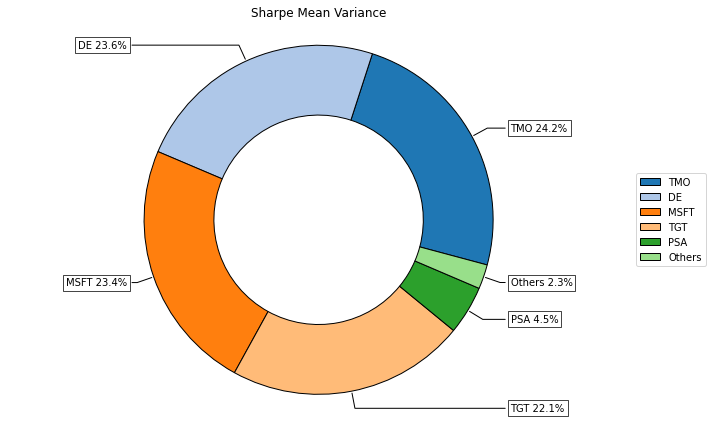

In [11]:
# Ploting the composition of the portfolio
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap='tab20',
                height=6, width=10, ax=None)

In [12]:
# Calculate de efficient frontier
points = 50 # Number of points in the frontier
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,3.6579%,16.6942%,0.0000%,0.0000%,13.2457%,0.0000%,0.0000%,0.0000%,...,0.0000%,5.6062%,13.7866%,0.6280%,0.0000%,1.9259%,4.3498%,0.0000%,30.5619%,0.0000%
1,0.0071%,0.0000%,0.0000%,10.8282%,0.0000%,0.0000%,15.6687%,8.9844%,0.0000%,0.0000%,...,0.0000%,0.0000%,16.3920%,0.0000%,0.0000%,9.1857%,13.2680%,0.0000%,13.3277%,0.0000%
2,0.0463%,0.0000%,0.0000%,7.0434%,0.0000%,0.0000%,16.2837%,12.7919%,0.0000%,0.0000%,...,0.0000%,0.0000%,17.0590%,0.0000%,0.0000%,12.0099%,16.5116%,0.0000%,3.1530%,0.0000%
3,0.1271%,0.0000%,0.0000%,1.4325%,0.0000%,0.0000%,15.0209%,16.1263%,0.0000%,0.0000%,...,0.0000%,0.0000%,16.1466%,0.0000%,0.0000%,14.5386%,19.7008%,0.0000%,0.0000%,0.0000%
4,0.2054%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,11.2082%,19.1881%,0.0000%,0.0000%,...,0.0000%,0.0000%,13.2681%,0.0000%,0.0000%,17.3454%,22.1684%,0.0000%,0.0000%,0.0000%


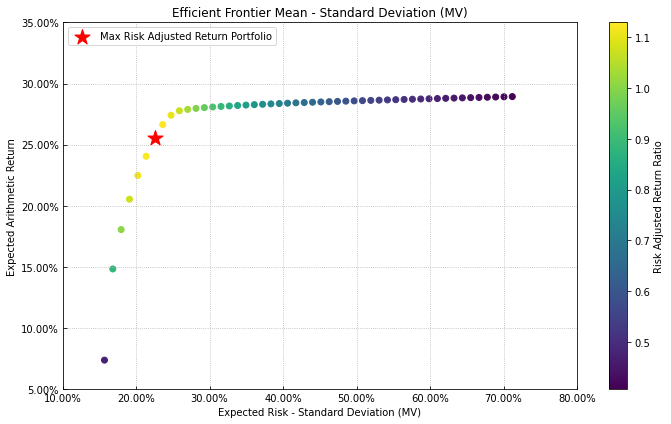

In [14]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, 
                    alpha=0.05, cmap='viridis', w=w, label=label, marker='*', s=16, c='r', 
                    height=6, width=10, ax=None)